In [2]:
import time
import random
from pdp_lib import processing as proc
from pdp_lib import util
from GA_lib import GA
from GA_lib import operation
from GA_lib import evaluate
from GA_lib import modify

# Load file (Use realative path), Create distances and duration tables


In [3]:
start_time = time.time()
# use 'relative path' in filename
filename = 'pdp_instances/LiLim/pdp_100/lc107.txt'

numVehicles, LoadCapacities, speed, data = proc.load_file(filename)
LOCATIONS = data[0]
DEMANDS = data[1]
timeWindows = data[2]
serviceTimes = data[3]
pickupSiblings = data[4]
deliverySiblings = data[5]
requestType = data[6]
REQUESTS = proc.generate_request(pickupSiblings,deliverySiblings,requestType)
DISTANCES = proc.createDistanceTable(LOCATIONS)
DURATIONS = proc.createDurationTable(LOCATIONS, DISTANCES, serviceTimes, speed)


print(" processing time --- %s seconds ---" % (time.time() - start_time))

 processing time --- 0.03500247001647949 seconds ---


# Unoptimized Routes

Unoptimized distances is: 3367.79589042


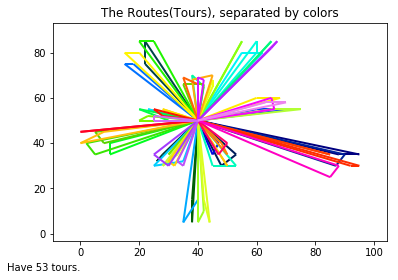

In [4]:
unlimitedVehicles=300
chromosome = GA.initialize_Feasible_chromosome(DISTANCES, DURATIONS, timeWindows,REQUESTS,unlimitedVehicles, DEMANDS, LoadCapacities,maxSpot=2)
dist = evaluate.chromosomeRoutesDistance(chromosome,DISTANCES)
print('Unoptimized distances is: '+str(dist))
util.draw_tours(chromosome,LOCATIONS)

# Create a chromosome.

Chromosome initializing time --- 1.9881131649017334 seconds ---
Tour Distances of chromosome: 1719.41398684


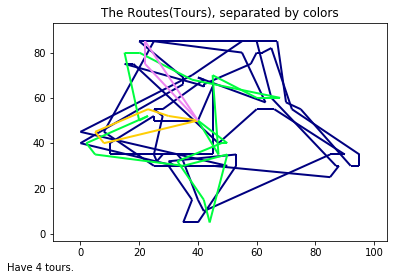

[[0, [10, 4, 40, 31, 38, 42, 24, 51, 1, 28, 37, 8, 16, 19, 7, 45, 32, 47, 46, 49, 3, 50, 13, 43, 52, 48, 30, 39, 27, 25, 26, 21, 41, 12, 0, 35, 23, 36, 2, 11, 20], [20, 24, 25, 32, 31, 43, 41, 57, 54, 81, 104, 78, 76, 86, 87, 90, 67, 17, 18, 7, 5, 3, 98, 96, 95, 94, 83, 71, 70, 73, 82, 84, 92, 93, 16, 11, 10, 30, 38, 44, 46, 74, 72, 56, 58, 60, 59, 45, 64, 61, 103, 39, 101, 9, 100, 106, 97, 88, 79, 77, 80, 68, 48, 51, 34, 12, 99, 89, 6, 4, 23, 102, 26, 22, 52, 50, 49, 47, 105, 69, 1, 75]], [1, [18, 9, 29, 22, 44, 5, 14, 34, 33], [63, 65, 42, 55, 53, 62, 40, 35, 37, 27, 29, 19, 15, 8, 85, 91, 2, 66]], [2, [17, 15], [33, 36, 28, 21]], [3, [6], [13, 14]]]


In [5]:
start_time = time.time()
chromosome = GA.initialize_Feasible_chromosome(DISTANCES, DURATIONS, timeWindows,REQUESTS,numVehicles, DEMANDS, LoadCapacities)
cal_time = time.time() - start_time
print("Chromosome initializing time --- %s seconds ---" % (cal_time))
dist = evaluate.chromosomeRoutesDistance(chromosome,DISTANCES)
print('Tour Distances of chromosome: '+str(dist))
util.draw_tours(chromosome,LOCATIONS)
print (chromosome)

# Try restricting the 'max spots' to visit not more than 10 spots per vehicle

Chromosome initializing time --- 0.017000436782836914 seconds ---
Tour Distances of chromosome: 2156.25961643


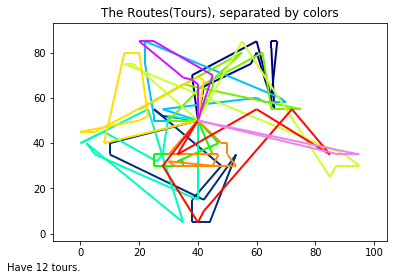

[[0, [2, 50, 45, 48, 51], [5, 98, 96, 86, 94, 93, 92, 88, 97, 9]], [1, [38, 31, 13, 16, 29], [32, 31, 55, 74, 53, 58, 59, 64, 26, 22]], [2, [43, 12, 6, 11, 44], [24, 25, 13, 14, 85, 84, 89, 91, 23, 102]], [3, [15, 19, 30, 18, 27], [57, 35, 37, 60, 28, 38, 34, 50, 49, 21]], [4, [21, 25, 22, 35, 32], [67, 42, 41, 40, 61, 103, 45, 51, 52, 69]], [5, [1, 46, 10, 0, 49], [20, 3, 95, 87, 82, 10, 30, 99, 1, 75]], [6, [39, 40, 52, 8, 36], [17, 18, 76, 70, 73, 77, 79, 80, 100, 106]], [7, [17, 14, 20, 3, 9], [33, 19, 15, 27, 29, 39, 101, 36, 6, 4]], [8, [37, 33, 26, 34, 24], [65, 63, 62, 72, 44, 46, 68, 66, 47, 105]], [9, [23, 28, 42, 47], [43, 90, 81, 104, 83, 54, 56, 48]], [10, [5, 4, 7], [7, 8, 11, 16, 12, 2]], [11, [41], [78, 71]]]


In [6]:
start_time = time.time()
chromosome = GA.initialize_Feasible_chromosome(DISTANCES, DURATIONS, timeWindows,REQUESTS,numVehicles, DEMANDS, LoadCapacities,maxSpot=10)
cal_time = time.time() - start_time
print("Chromosome initializing time --- %s seconds ---" % (cal_time))
dist = evaluate.chromosomeRoutesDistance(chromosome,DISTANCES)
print('Tour Distances of chromosome: '+str(dist))
util.draw_tours(chromosome,LOCATIONS)
print (chromosome)

# Test Crossover

In [7]:

parent1 = GA.initialize_Feasible_chromosome(DISTANCES, DURATIONS, timeWindows,REQUESTS,numVehicles, DEMANDS, LoadCapacities,maxSpot=10000)
parent2 = GA.initialize_Feasible_chromosome(DISTANCES, DURATIONS, timeWindows,REQUESTS,numVehicles, DEMANDS, LoadCapacities,maxSpot=10000)

In [8]:
start_time = time.time()
maxSpot = 10000
child1,child2 = operation.crossover(DISTANCES, DURATIONS, timeWindows,REQUESTS, parent1, parent2, DEMANDS, LoadCapacities,maxSpot)
dist = evaluate.chromosomeRoutesDistance(parent1,DISTANCES)

print("Chromosome crossover time --- %s seconds ---" % (time.time()-start_time))
print('Parent1 Distances of chromosome: '+str(dist))
dist = evaluate.chromosomeRoutesDistance(parent2,DISTANCES)
print('Parent2 Distances of chromosome: '+str(dist))
print (child1)
dist = evaluate.chromosomeRoutesDistance(child1,DISTANCES)
print('Child1 Distances of chromosome: '+str(dist))
print (child2)
dist = evaluate.chromosomeRoutesDistance(child2,DISTANCES)
print('Child2 Distances of chromosome: '+str(dist))


Chromosome crossover time --- 0.10900616645812988 seconds ---
Parent1 Distances of chromosome: 2042.79286525
Parent2 Distances of chromosome: 1504.72146467
[[1, [34, 9, 14, 33, 35, 24], [67, 65, 63, 62, 27, 29, 19, 15, 44, 46, 69, 66]], [2, [], []], [3, [], []], [4, [], []], [0, [7, 36, 12, 30, 46, 48, 16, 2, 13, 29, 45, 11, 39, 43, 47, 23, 41, 3, 50, 1, 38, 0, 17, 52, 25, 8, 44, 42, 22, 18, 21, 15, 31, 5, 6, 27, 49, 40, 20, 51, 19, 37, 10, 26, 28, 4, 32], [5, 3, 7, 13, 17, 18, 20, 24, 25, 32, 33, 31, 43, 42, 41, 57, 55, 54, 81, 104, 78, 76, 87, 86, 90, 98, 96, 95, 94, 92, 8, 82, 83, 74, 40, 35, 37, 56, 53, 71, 70, 73, 84, 93, 11, 10, 72, 61, 103, 58, 60, 45, 38, 39, 101, 30, 28, 16, 14, 12, 100, 106, 97, 85, 9, 6, 4, 89, 88, 79, 77, 80, 64, 68, 59, 48, 51, 36, 34, 23, 102, 26, 22, 21, 52, 50, 91, 99, 2, 1, 75, 49, 47, 105]]]
Child1 Distances of chromosome: 1510.44127299
[[3, [17, 15, 13, 23, 10, 19], [20, 43, 33, 38, 30, 36, 48, 28, 34, 26, 22, 21]], [1, [7, 5, 22, 29, 34, 18, 1, 9, 3

In [9]:
dist = evaluate.chromosomeRoutesDistance(child1,DISTANCES)
print('old Child1 Distances of chromosome: '+str(dist))
print (child2)
dist = evaluate.chromosomeRoutesDistance(child2,DISTANCES)
print('old Child2 Distances of chromosome: '+str(dist))
for i in range(100):
    child1,child2 = operation.crossover(DISTANCES, DURATIONS, timeWindows,REQUESTS, parent1, parent2, DEMANDS, LoadCapacities,maxSpot)
dist = evaluate.chromosomeRoutesDistance(child1,DISTANCES)
print('new Child1 Distances of chromosome: '+str(dist))
print (child2)
dist = evaluate.chromosomeRoutesDistance(child2,DISTANCES)
print('new Child2 Distances of chromosome: '+str(dist))


old Child1 Distances of chromosome: 1510.44127299
[[3, [17, 15, 13, 23, 10, 19], [20, 43, 33, 38, 30, 36, 48, 28, 34, 26, 22, 21]], [1, [7, 5, 22, 29, 34, 18, 1, 9, 3, 4, 11, 6, 2, 50, 14, 51, 28, 49], [13, 7, 3, 5, 96, 95, 98, 65, 42, 55, 54, 53, 56, 40, 62, 35, 37, 27, 29, 10, 8, 19, 15, 11, 93, 16, 14, 12, 97, 9, 6, 4, 99, 2, 23, 102]], [0, [44, 38, 26, 46, 45, 40, 33, 36, 0, 16, 43, 41, 47, 24, 39, 35, 12, 30, 20, 48, 32, 42, 25, 52, 8, 37, 27, 21, 31], [24, 25, 17, 18, 32, 31, 57, 41, 67, 63, 90, 87, 86, 81, 104, 78, 76, 83, 94, 92, 82, 71, 70, 73, 74, 72, 44, 45, 46, 39, 101, 60, 58, 64, 61, 103, 85, 84, 79, 77, 80, 59, 88, 89, 100, 106, 91, 66, 68, 51, 69, 50, 47, 105, 49, 52, 1, 75]]]
old Child2 Distances of chromosome: 1714.63337979


new Child1 Distances of chromosome: 2201.14689951
[[0, [44, 38, 26, 46, 45, 40, 33, 36, 0, 16, 43, 41, 47, 24, 39, 35, 12, 30, 20, 48, 32, 42, 25, 52, 8, 37, 27, 21, 31, 6, 2, 29, 28, 51, 49, 17, 50, 3, 23, 19, 13, 10, 15], [20, 24, 25, 5, 98, 95, 96, 13, 17, 18, 33, 32, 31, 57, 55, 41, 43, 67, 63, 90, 87, 86, 81, 104, 78, 76, 54, 56, 53, 83, 94, 92, 82, 71, 70, 73, 74, 72, 44, 45, 46, 9, 93, 97, 14, 28, 30, 39, 101, 38, 60, 58, 64, 61, 103, 85, 84, 79, 77, 80, 59, 48, 34, 36, 26, 6, 4, 88, 89, 100, 106, 99, 91, 66, 68, 51, 69, 21, 22, 50, 47, 105, 49, 52, 1, 75]], [1, [7, 5, 22, 29, 34, 18, 1, 9, 3, 4, 11, 6, 2, 50, 14, 51, 28, 49, 15, 10], [20, 13, 7, 3, 5, 96, 95, 98, 65, 42, 55, 54, 53, 56, 40, 62, 35, 37, 27, 29, 10, 8, 19, 15, 30, 28, 11, 93, 16, 14, 12, 97, 9, 6, 4, 99, 2, 23, 102, 21]]]
new Child2 Distances of chromosome: 1935.08714528


# Try GA !!!

In [10]:
start_time = time.time()
population_size = 100
populations = []
for i in range(population_size):
    chromosome = GA.initialize_Feasible_chromosome(DISTANCES, DURATIONS, timeWindows,REQUESTS,numVehicles, DEMANDS, LoadCapacities,maxSpot=10000)
    populations.append(chromosome)
print("Populations creation time --- %s seconds ---" % (time.time()-start_time))  
##########################################################################


Populations creation time --- 159.32499623298645 seconds ---


Crossovers time --- 69.95676231384277 seconds ---
Distances of the best chromosome: 1130.05639547
[[2, [7, 4, 5, 9, 10, 18, 14], [20, 7, 8, 19, 15, 27, 29, 35, 37, 30, 11, 16, 12, 2]], [1, [14, 19, 15, 3], [27, 29, 28, 38, 34, 6, 4, 21]], [0, [36, 16, 26, 17, 49, 27, 28, 51, 48, 3, 45, 36, 50, 43, 51, 33, 49, 13], [96, 98, 98, 86, 32, 33, 31, 54, 63, 94, 95, 95, 92, 70, 70, 73, 73, 93, 93, 84, 56, 36, 6, 97, 88, 89, 99, 99, 4, 26, 22, 66, 50, 49, 47, 105]]]
Distances of the worst chromosome: 1609.12289784
[[2, [10, 18, 14, 1, 9, 19], [20, 3, 10, 19, 15, 27, 29, 35, 38, 37, 30, 34]], [0, [16, 24, 28, 21, 11, 32, 20, 17, 12, 47, 26, 46, 52, 27, 43, 29, 15, 49, 36, 5, 38, 8, 40, 35, 33, 50, 0, 13, 42, 23, 45, 41, 51, 3, 25, 4, 30, 44, 31, 22, 39], [24, 25, 17, 18, 32, 33, 31, 43, 42, 41, 67, 90, 98, 87, 86, 81, 104, 78, 76, 83, 95, 96, 8, 7, 63, 54, 55, 57, 53, 56, 44, 40, 74, 84, 82, 70, 71, 73, 77, 85, 93, 97, 11, 61, 103, 58, 60, 45, 46, 28, 36, 39, 101, 26, 6, 51, 48, 59, 64, 66, 80, 

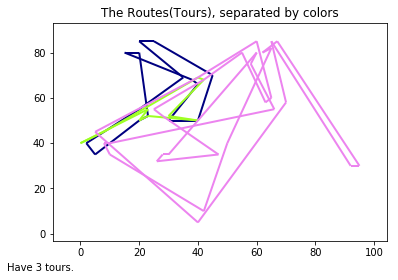

[[2, [7, 4, 5, 9, 10, 18, 14], [20, 7, 8, 19, 15, 27, 29, 35, 37, 30, 11, 16, 12, 2]], [1, [14, 19, 15, 3], [27, 29, 28, 38, 34, 6, 4, 21]], [0, [36, 16, 26, 17, 49, 27, 28, 51, 48, 3, 45, 36, 50, 43, 51, 33, 49, 13], [96, 98, 98, 86, 32, 33, 31, 54, 63, 94, 95, 95, 92, 70, 70, 73, 73, 93, 93, 84, 56, 36, 6, 97, 88, 89, 99, 99, 4, 26, 22, 66, 50, 49, 47, 105]]]


In [12]:
start_time = time.time()
generations = 100
fitness = []
for gen in range(generations):
    fitness=[]
    for chromosome in populations:
        fitness.append(evaluate.chromosomeFitness(chromosome,DISTANCES))
    populations = [x for _,x in sorted(zip(fitness,populations),reverse=True)]
    populations.pop()
    populations.pop()
    ## Elitism
    elite1 = populations.pop(0)
    elite2 = populations.pop(0)
    id1,id2 = random.randrange(0,len(populations)),random.randrange(0,len(populations))
    parent1,parent2 = populations[id1],populations[id2]
    ## Try crossover only elites
    # parent1,parent2 = elite1,elite2
    child1,child2 = operation.crossover(DISTANCES, DURATIONS, timeWindows,REQUESTS, parent1, parent2, DEMANDS, LoadCapacities,maxSpot)
    child1 = operation.mutate(child1,DISTANCES, DURATIONS, timeWindows,REQUESTS, DEMANDS, LoadCapacities,maxSpot)
    child2 = operation.mutate(child2,DISTANCES, DURATIONS, timeWindows,REQUESTS, DEMANDS, LoadCapacities,maxSpot)
    populations.append(child1)
    populations.append(child2)
    populations.append(elite1)
    populations.append(elite2)


fitness=[]
for chromosome in populations:
    fitness.append(evaluate.chromosomeFitness(chromosome,DISTANCES))
populations = [x for _,x in sorted(zip(fitness,populations),reverse=True)]
print("Crossovers time --- %s seconds ---" % (time.time()-start_time))  

dist = evaluate.chromosomeRoutesDistance(populations[0],DISTANCES)
print('Distances of the best chromosome: '+str(dist))
print (populations[0])
dist = evaluate.chromosomeRoutesDistance(populations[len(populations)-1],DISTANCES)
print('Distances of the worst chromosome: '+str(dist))
print(populations[len(populations)-1])

util.draw_tours(populations[0],LOCATIONS)
print(populations[0])

# Try GA with restricted spots!!

In [13]:
start_time = time.time()
population_size = 200
populations = []
for i in range(population_size):
    chromosome = GA.initialize_Feasible_chromosome(DISTANCES, DURATIONS, timeWindows,REQUESTS,numVehicles,maxSpot=10)
    populations.append(chromosome)
print("Populations creation time --- %s seconds ---" % (time.time()-start_time))  
##########################################################################


Populations creation time --- 3.1801815032958984 seconds ---


In [14]:
maxSpot=10
start_time = time.time()
generations = 1000
fitness = []
for gen in range(generations):
    fitness=[]
    for chromosome in populations:
        fitness.append(evaluate.chromosomeFitness(chromosome,DISTANCES))
    populations = [x for _,x in sorted(zip(fitness,populations),reverse=True)]
    populations.pop()
    populations.pop()
    ## Elitism
    elite1 = populations.pop(0)
    elite2 = populations.pop(0)
    id1,id2 = random.randrange(0,len(populations)),random.randrange(0,len(populations))
    parent1,parent2 = populations[id1],populations[id2]
    ## Try crossover only elites
    # parent1,parent2 = elite1,elite2
    child1,child2 = operation.crossover(DISTANCES, DURATIONS, timeWindows,REQUESTS, child1, child2,maxSpot)
    populations.append(child1)
    populations.append(child2)
    populations.append(elite1)
    populations.append(elite2)


fitness=[]
for chromosome in populations:
    fitness.append(evaluate.chromosomeFitness(chromosome,DISTANCES))
populations = [x for _,x in sorted(zip(fitness,populations),reverse=True)]
print("Crossovers time --- %s seconds ---" % (time.time()-start_time))  

dist = evaluate.chromosomeRoutesDistance(populations[0],DISTANCES)
print('Distances of the best chromosome: '+str(dist))
print (populations[0])
dist = evaluate.chromosomeRoutesDistance(populations[len(populations)-1],DISTANCES)
print('Distances of the worst chromosome: '+str(dist))
print(populations[len(populations)-1])

Crossovers time --- 19.142090559005737 seconds ---
Distances of the best chromosome: 1869.06741812
[[6, [], []], [7, [], []], [8, [], []], [9, [], []], [10, [], []], [11, [], []], [12, [], []], [13, [], []], [14, [], []], [15, [], []], [16, [], []], [17, [], []], [18, [], []], [19, [], []], [20, [], []], [21, [], []], [22, [], []], [23, [], []], [24, [], []], [5, [4], [7, 11]], [4, [45], [86, 88]], [3, [23, 38], [43, 74, 64, 48]], [0, [51, 20, 48, 42, 25, 36, 33, 19, 41, 0, 11, 13, 5, 9, 26, 15, 46, 2, 35, 49, 14, 21, 6, 12, 16, 50, 27, 1, 8, 43, 17, 39, 47, 44, 24, 32, 31], [24, 32, 33, 31, 41, 67, 63, 81, 104, 78, 76, 87, 90, 95, 96, 98, 3, 5, 13, 17, 18, 8, 25, 27, 29, 19, 15, 10, 83, 94, 92, 93, 84, 82, 70, 71, 73, 44, 46, 58, 61, 103, 45, 9, 85, 97, 14, 28, 39, 101, 38, 36, 34, 51, 59, 79, 89, 26, 23, 102, 22, 21, 52, 50, 69, 66, 91, 2, 99, 1, 75, 49, 47, 105]], [1, [30, 28, 52, 22, 3, 29, 7, 10, 34], [20, 42, 57, 55, 65, 62, 40, 54, 53, 56, 60, 30, 16, 12, 100, 106, 6, 4]], [2, [

In [ ]:
maxSpot=10
start_time = time.time()
generations = 100
fitness = []
for gen in range(generations):
    fitness=[]
    for chromosome in populations:
        fitness.append(evaluate.chromosomeFitness(chromosome,DISTANCES))
    populations = [x for _,x in sorted(zip(fitness,populations),reverse=True)]
    populations.pop()
    populations.pop()
    ## Elitism
    elite1 = populations.pop(0)
    elite2 = populations.pop(0)
    id1,id2 = random.randrange(0,len(populations)),random.randrange(0,len(populations))
    parent1,parent2 = populations[id1],populations[id2]
    ## Try crossover only elites
    # parent1,parent2 = elite1,elite2
    child1,child2 = operation.crossover(DISTANCES, DURATIONS, timeWindows,REQUESTS, child1, child2,maxSpot)
    populations.append(child1)
    populations.append(child2)
    populations.append(elite1)
    populations.append(elite2)


fitness=[]
for chromosome in populations:
    fitness.append(evaluate.chromosomeFitness(chromosome,DISTANCES))
populations = [x for _,x in sorted(zip(fitness,populations),reverse=True)]
print("Crossovers time --- %s seconds ---" % (time.time()-start_time))  

dist = evaluate.chromosomeRoutesDistance(populations[0],DISTANCES)
print('Distances of the best chromosome: '+str(dist))
print (populations[0])
dist = evaluate.chromosomeRoutesDistance(populations[len(populations)-1],DISTANCES)
print('Distances of the worst chromosome: '+str(dist))
print(populations[len(populations)-1])

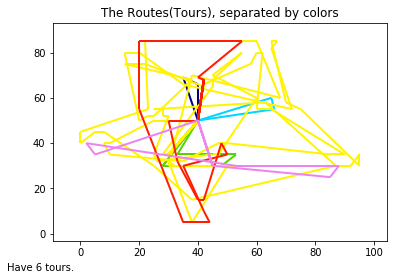

In [15]:
util.draw_tours(populations[0],LOCATIONS)